In [1]:
# !pip install sklearn --upgrade

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
from numpy.random import seed
seed(123)

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

plt.style.use('seaborn')
import seaborn as sns

import geopandas as gpd
import time
import re
import xgboost as xgb
from xgboost import plot_importance

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")

C:\Users\Home Laptop\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from keras import models, layers, optimizers, regularizers
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# !pip install xgboost

In [ ]:
# conda install geopandas

In [5]:
df = pd.read_csv('merged_data.csv', low_memory=False)

# checking shape
print("The dataset has {} rows and {} columns.".format(*df.shape))

# ... and duplicates
print("It contains {} duplicates.".format(df.duplicated().sum()))

The dataset has 719335 rows and 58 columns.
It contains 764 duplicates.


In [6]:
df.head(1)

,price_id,daily_price,weekly_price,cleaning_fee,security_deposit,availability_id,availability_30,availability_60,availability_90,amenity_id,...,bathrooms,accommodates,beds,room_type,minimum_nights,maximum_nights,latitude,longitude,neighbourhood,zipcode
0,3,55.0,NaN,NaN,NaN,3,18,43,73,3,...,1.0,2,1.0,Private room,1,1125,34.51013,-118.212407,Acton,93510


In [6]:
df.columns

Index(['price_id', 'daily_price', 'weekly_price', 'cleaning_fee',
       'security_deposit', 'availability_id', 'availability_30',
       'availability_60', 'availability_90', 'amenity_id', 'wireless_Internet',
       'air_conditioning', 'pool', 'self_check_in', 'private_entrance',
       'breakfast', 'free_parking_on_premises', 'tv', 'gym', 'hot_tub',
       'indoor_fireplace', 'heating', 'family_kid_friendly', 'washer', 'dryer',
       'hangers', 'iron', 'shampoo', 'hair_dryer', 'high_chair', 'crib',
       'carbon_monoxide_detector', 'smoke_detector',
       'babysitter_recommendations', 'pets_allowed', 'first_aid_kit',
       'host_id', 'host_since', 'host_is_superhost', 'host_response_time',
       'property_id', 'number_of_reviews', 'review_scores_rating', 'comments',
       'neighborhood_id', 'listing_description', 'property_type', 'bedrooms',
       'bathrooms', 'accommodates', 'beds', 'room_type', 'minimum_nights',
       'maximum_nights', 'latitude', 'longitude', 'neighbourho

In [8]:
df = df.drop(columns=['price_id','availability_id','amenity_id', 'neighborhood_id','host_id'])

In [9]:
df

,daily_price,weekly_price,cleaning_fee,security_deposit,availability_30,availability_60,availability_90,wireless_Internet,air_conditioning,pool,...,bathrooms,accommodates,beds,room_type,minimum_nights,maximum_nights,latitude,longitude,neighbourhood,zipcode
0,55.0,NaN,NaN,NaN,18,43,73,1,1,0,...,1.0,2,1.0,Private room,1,1125,34.510130,-118.212407,Acton,93510
1,55.0,NaN,NaN,NaN,18,43,73,1,1,0,...,1.0,2,1.0,Private room,1,1125,34.510130,-118.212407,Acton,93510
2,55.0,NaN,NaN,NaN,18,43,73,1,1,0,...,1.0,2,1.0,Private room,1,1125,34.510130,-118.212407,Acton,93510
3,55.0,NaN,NaN,NaN,18,43,73,1,1,0,...,1.0,2,1.0,Private room,1,1125,34.510130,-118.212407,Acton,93510
4,55.0,NaN,NaN,NaN,18,43,73,1,1,0,...,1.0,2,1.0,Private room,1,1125,34.510130,-118.212407,Acton,93510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719330,115.0,NaN,NaN,NaN,5,19,43,1,1,0,...,1.0,4,3.0,Entire home/apt,1,30,34.168772,-118.614956,Woodland Hills,91367
719331,115.0,NaN,NaN,NaN,5,19,43,1,1,0,...,1.0,4,3.0,Entire home/apt,1,30,34.168772,-118.614956,Woodland Hills,91367
719332,115.0,NaN,NaN,NaN,5,19,43,1,1,0,...,1.0,4,3.0,Entire home/apt,1,30,34.168772,-118.614956,Woodland Hills,91367
719333,115.0,NaN,NaN,NaN,5,19,43,1,1,0,...,1.0,4,3.0,Entire home/apt,1,30,34.168772,-118.614956,Woodland Hills,91367


In [10]:
df.room_type.value_counts(normalize=True)

Entire home/apt    0.665620
Private room       0.327543
Shared room        0.006837
Name: room_type, dtype: float64

In [11]:
df.property_type.value_counts(normalize=True)

House                 0.500607
Apartment             0.315251
Guesthouse            0.053184
Bungalow              0.028325
Condominium           0.017508
Loft                  0.016649
Other                 0.016588
Townhouse             0.013187
Bed & Breakfast       0.011256
Cabin                 0.008511
Camper/RV             0.005355
Villa                 0.003710
Guest suite           0.002595
Dorm                  0.001963
Chalet                0.000988
Treehouse             0.000777
In-law                0.000573
Yurt                  0.000503
Hostel                0.000478
Serviced apartment    0.000417
Tipi                  0.000377
Boutique hotel        0.000375
Hut                   0.000318
Vacation home         0.000267
Castle                0.000118
Island                0.000110
Earth House           0.000010
Name: property_type, dtype: float64

In [12]:
# Replacing categories that are types of houses or apartments
df.property_type.replace({
    'Townhouse': 'House',
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth house': 'House',
    'Chalet': 'House'  
    }, inplace=True)

# Replacing other categories with 'other'
df.loc[~df.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'

In [15]:
df[['daily_price', 'cleaning_fee', 'security_deposit']].head(3)

,daily_price,cleaning_fee,security_deposit
0,55.0,NaN,NaN
1,55.0,NaN,NaN
2,55.0,NaN,NaN


In [16]:
# checking Nan's in "price" column
df.daily_price.isna().sum()

0

In [17]:
# Nan's in "cleaning_fee" column
df.cleaning_fee.isna().sum()

105962

In [18]:
#assumption:replace these null values with $0.00
df.cleaning_fee.fillna('$0.00', inplace=True)
df.cleaning_fee.isna().sum()

0

In [19]:
df.security_deposit.isna().sum()

280935

In [20]:
df.security_deposit.fillna('$0.00', inplace=True)
df.security_deposit.isna().sum()

0

In [21]:
df.dtypes

daily_price                   float64
weekly_price                  float64
cleaning_fee                   object
security_deposit               object
availability_30                 int64
availability_60                 int64
availability_90                 int64
wireless_Internet               int64
air_conditioning                int64
pool                            int64
self_check_in                   int64
private_entrance                int64
breakfast                       int64
free_parking_on_premises        int64
tv                              int64
gym                             int64
hot_tub                         int64
indoor_fireplace                int64
heating                         int64
family_kid_friendly             int64
washer                          int64
dryer                           int64
hangers                         int64
iron                            int64
shampoo                         int64
hair_dryer                      int64
high_chair  

In [22]:
df['daily_price'].describe()

count    719335.000000
mean        135.123250
std         152.505431
min          19.000000
25%          75.000000
50%         103.000000
75%         150.000000
max        7500.000000
Name: daily_price, dtype: float64

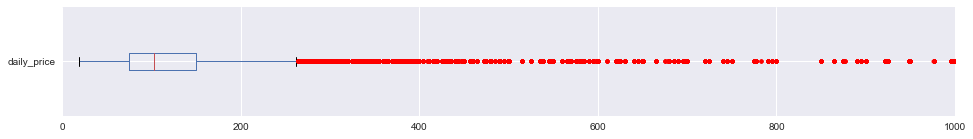

In [23]:
#price distribution
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
df['daily_price'].plot(kind='box', xlim=(0, 1000), vert=False, flierprops=red_square, figsize=(16,2));

In [24]:
df.drop(df[ (df.daily_price > 500) | (df.daily_price == 0) ].index, axis=0, inplace=True)

In [25]:
df['daily_price'].describe()

count    708627.000000
mean        123.749952
std          75.942083
min          19.000000
25%          75.000000
50%         100.000000
75%         149.000000
max         500.000000
Name: daily_price, dtype: float64

In [26]:
print("The dataset has {} rows and {} columns - after being price-wise preprocessed.".format(*df.shape))

The dataset has 708627 rows and 53 columns - after being price-wise preprocessed.


In [27]:
pd.set_option('display.max_columns', None)

In [28]:
test = df.dropna()

In [29]:
test.head()

,daily_price,weekly_price,cleaning_fee,security_deposit,availability_30,availability_60,availability_90,wireless_Internet,air_conditioning,pool,self_check_in,private_entrance,breakfast,free_parking_on_premises,tv,gym,hot_tub,indoor_fireplace,heating,family_kid_friendly,washer,dryer,hangers,iron,shampoo,hair_dryer,high_chair,crib,carbon_monoxide_detector,smoke_detector,babysitter_recommendations,pets_allowed,first_aid_kit,host_since,host_is_superhost,host_response_time,property_id,number_of_reviews,review_scores_rating,comments,listing_description,property_type,bedrooms,bathrooms,accommodates,beds,room_type,minimum_nights,maximum_nights,latitude,longitude,neighbourhood,zipcode
240,79.0,400.0,20,$0.00,27,45,70,1,0,0,0,0,0,1,1,0,0,0,1,0,1,1,1,0,0,0,0,0,1,1,0,1,0,2012-05-08,0.0,within a few hours,6153123,9,70.0,Elisabeth was very welcoming and for the first...,Private spacious room with private attached ba...,Other,1.0,1.0,4,1.0,Private room,1,1125,34.030587,-118.299548,Adams-Normandie,90007
241,79.0,400.0,20,$0.00,27,45,70,1,0,0,0,0,0,1,1,0,0,0,1,0,1,1,1,0,0,0,0,0,1,1,0,1,0,2012-05-08,0.0,within a few hours,6153123,9,70.0,We rented this 1st floor apartment for 3 days....,Private spacious room with private attached ba...,Other,1.0,1.0,4,1.0,Private room,1,1125,34.030587,-118.299548,Adams-Normandie,90007
242,79.0,400.0,20,$0.00,27,45,70,1,0,0,0,0,0,1,1,0,0,0,1,0,1,1,1,0,0,0,0,0,1,1,0,1,0,2012-05-08,0.0,within a few hours,6153123,9,70.0,Nous navons pas eu la possibilité de discuter ...,Private spacious room with private attached ba...,Other,1.0,1.0,4,1.0,Private room,1,1125,34.030587,-118.299548,Adams-Normandie,90007
243,79.0,400.0,20,$0.00,27,45,70,1,0,0,0,0,0,1,1,0,0,0,1,0,1,1,1,0,0,0,0,0,1,1,0,1,0,2012-05-08,0.0,within a few hours,6153123,9,70.0,"Its good place with that price, helpful people...",Private spacious room with private attached ba...,Other,1.0,1.0,4,1.0,Private room,1,1125,34.030587,-118.299548,Adams-Normandie,90007
244,79.0,400.0,20,$0.00,27,45,70,1,0,0,0,0,0,1,1,0,0,0,1,0,1,1,1,0,0,0,0,0,1,1,0,1,0,2012-05-08,0.0,within a few hours,6153123,9,70.0,Debbie who lived upstairs was a gracious and t...,Private spacious room with private attached ba...,Other,1.0,1.0,4,1.0,Private room,1,1125,34.030587,-118.299548,Adams-Normandie,90007


In [ ]:
# !pip install geopy

In [31]:
from geopy.distance import great_circle

In [32]:
def distance_to_mid(latitude, longitude):
    los_angeles_center = (34.0522, -118.2437)
    accommodation = (latitude, longitude)
    return great_circle(los_angeles_center, accommodation).km

In [33]:
test['distance'] = test.apply(lambda x: distance_to_mid(x.latitude, x.longitude), axis=1)

In [34]:
test["cleaning_fee_2"] = test["cleaning_fee"].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
test["security_deposit_2"] = test["security_deposit"].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
test["distance"] = test["distance"].astype(str).str.replace('km', '').str.replace(',', '').astype(float)

In [35]:
test_500 = test.loc[test['daily_price']<=500]
test_sorted = test_500.sort_values(['daily_price'], ascending=False)

In [36]:
test_distance = test_500.groupby('distance').mean()['daily_price'].reset_index()

In [37]:
test_distance

,distance,daily_price
0,0.614908,60.0
1,0.707075,83.0
2,0.746310,36.0
3,0.763141,58.0
4,0.817459,110.0
...,...,...
2277,61.484315,149.0
2278,62.031512,85.0
2279,62.681837,35.0
2280,64.334319,40.0


In [32]:
pd.set_option('display.max_rows', None)  

In [33]:
test_distance

,distance,daily_price
0,0.614908,60.0
1,0.707075,83.0
2,0.746310,36.0
3,0.763141,58.0
4,0.817459,110.0
5,0.821658,35.0
6,0.839761,36.0
7,0.859587,143.0
8,0.905015,145.0
9,0.912015,100.0


In [38]:
test_sorted.shape

(238450, 56)

In [39]:
test['listing_description']

240       Private spacious room with private attached ba...
241       Private spacious room with private attached ba...
242       Private spacious room with private attached ba...
243       Private spacious room with private attached ba...
244       Private spacious room with private attached ba...
                                ...                        
718835    Private room with bright window light and view...
718836    Private room with bright window light and view...
718837    Private room with bright window light and view...
718838    Private room with bright window light and view...
718839    Private room with bright window light and view...
Name: listing_description, Length: 238450, dtype: object

In [42]:
# extract numbers 
test['size'] = test['listing_description'].str.extract('(\d{2,3}\s?[smSM])', expand=True)
test['size'] = test['size'].str.replace("\D", "")

In [43]:
# change datatype of size into float
test['size'] = test['size'].astype(float)

In [49]:
print('NaNs in size_column absolute:     ', test['size'].isna().sum())
print('NaNs in size_column in percentage:', round(test['size'].isna().sum()/len(test),3), '%')

NaNs in size_column absolute:      140889
NaNs in size_column in percentage: 0.591 %


In [50]:
test[['listing_description', 'size']].head(10)

,listing_description,size
240,Private spacious room with private attached ba...,NaN
241,Private spacious room with private attached ba...,NaN
242,Private spacious room with private attached ba...,NaN
243,Private spacious room with private attached ba...,NaN
244,Private spacious room with private attached ba...,NaN
245,Private spacious room with private attached ba...,NaN
246,Private spacious room with private attached ba...,NaN
247,Private spacious room with private attached ba...,NaN
248,Private spacious room with private attached ba...,NaN
249,Private spacious room with private attached ba...,NaN


In [51]:
test.listing_description.isna().sum()

0

In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238450 entries, 240 to 718839
Data columns (total 57 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   daily_price                 238450 non-null  float64
 1   weekly_price                238450 non-null  float64
 2   cleaning_fee                238450 non-null  object 
 3   security_deposit            238450 non-null  object 
 4   availability_30             238450 non-null  int64  
 5   availability_60             238450 non-null  int64  
 6   availability_90             238450 non-null  int64  
 7   wireless_Internet           238450 non-null  int64  
 8   air_conditioning            238450 non-null  int64  
 9   pool                        238450 non-null  int64  
 10  self_check_in               238450 non-null  int64  
 11  private_entrance            238450 non-null  int64  
 12  breakfast                   238450 non-null  int64  
 13  free_parking

In [53]:
# filter out sub_df to work with
selected_features = test[['accommodates', 'bathrooms', 'bedrooms',  'daily_price', 'cleaning_fee_2', 
                 'security_deposit_2', 'distance','size','availability_90','number_of_reviews']]

In [54]:
clean_data = selected_features.dropna()

In [55]:
# Read the training data into a dataframe
X = clean_data[['accommodates', 'bathrooms', 'bedrooms', 'daily_price', 'cleaning_fee_2', 
                 'security_deposit_2','distance','size','availability_90','number_of_reviews']]
y = clean_data['daily_price']

In [56]:
X.dtypes

accommodates            int64
bathrooms             float64
bedrooms              float64
daily_price           float64
cleaning_fee_2        float64
security_deposit_2    float64
distance              float64
size                  float64
availability_90         int64
number_of_reviews       int64
dtype: object

In [57]:
# Converting to datetime
test.host_since = pd.to_datetime(df.host_since) 

In [58]:
# Calculating the number of days
test['host_days_active'] = (datetime(2019, 4, 9) - test.host_since).astype('timedelta64[D]')

# Printing mean and median
print("Mean days as host:", round(test['host_days_active'].mean(),0))
print("Median days as host:", test['host_days_active'].median())

# Replacing null values with the median
test.host_days_active.fillna(test.host_days_active.median(), inplace=True)

Mean days as host: 2100.0
Median days as host: 2066.0


In [59]:
test_active_days = test.groupby('host_days_active').mean()['daily_price'].reset_index()

In [60]:
test_active_days['host_days_active'] = np.log(test_active_days['host_days_active'])

In [61]:
test_active_days

,host_days_active,daily_price
0,6.909753,82.000000
1,6.913737,46.526316
2,6.922644,60.000000
3,6.931472,69.000000
4,6.936343,46.000000
...,...,...
1124,8.218248,68.000000
1125,8.225503,59.340909
1126,8.253488,86.974359
1127,8.257386,177.727273


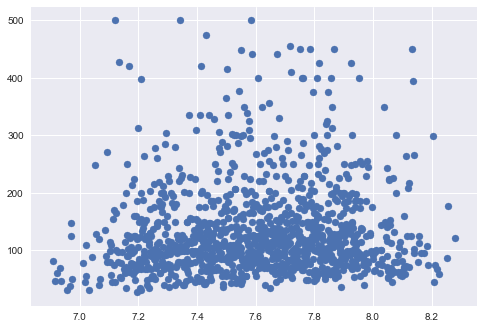

In [68]:
plt.scatter(test_active_days['host_days_active'], test_active_days['daily_price'], marker='o');

In [73]:
test.dtypes


daily_price                          float64
weekly_price                         float64
cleaning_fee                          object
security_deposit                      object
availability_30                        int64
availability_60                        int64
availability_90                        int64
wireless_Internet                      int64
air_conditioning                       int64
pool                                   int64
self_check_in                          int64
private_entrance                       int64
breakfast                              int64
free_parking_on_premises               int64
tv                                     int64
gym                                    int64
hot_tub                                int64
indoor_fireplace                       int64
heating                                int64
family_kid_friendly                    int64
washer                                 int64
dryer                                  int64
hangers   

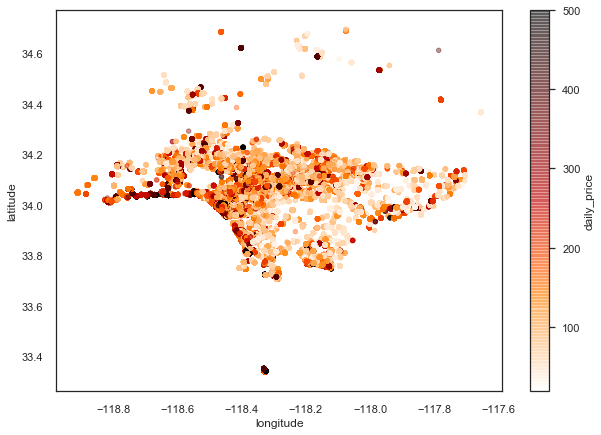

In [120]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7), 
        c="daily_price", cmap="gist_heat_r", colorbar=True, sharex=False);

In [123]:
# host_since time series graph
plt.figure(figsize=(15,5))
df.set_index('host_since').size().plot(label='Hosts joining Airbnb', color='orange')
# df.set_index('daily_price').resample('MS').size().plot(label='Price charged by host', color='green')
# plt.title('LA hosts joining Airbnb')
# plt.legend()
# plt.xlim('2008-08-01', '2019-03-31') # Limiting to whole months
# plt.xlabel('year')
# plt.ylabel('')
# plt.show()

TypeError: 'numpy.int32' object is not callable

<Figure size 1080x360 with 0 Axes>

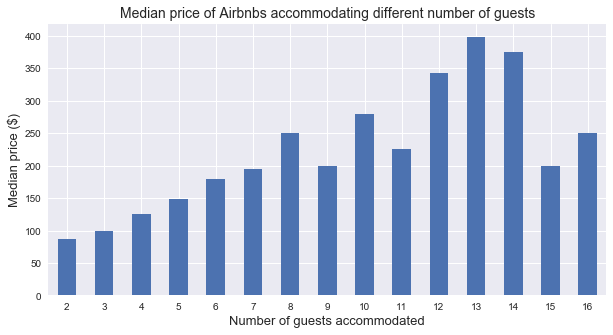

In [81]:
plt.figure(figsize=(10,5))
df.groupby('accommodates').daily_price.median().plot(kind='bar')
plt.title('Median price of Airbnbs accommodating different number of guests', fontsize=14)
plt.xlabel('Number of guests accommodated', fontsize=13)
plt.ylabel('Median price ($)', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

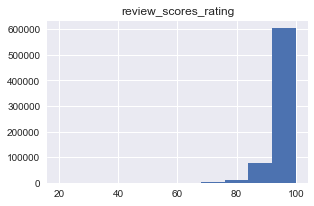

In [82]:
# Checking the distributions of the review ratings columns
variables_to_plot = list(df.columns[df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [87]:
# Importing the London borough boundary GeoJSON file as a dataframe in geopandas
map_df = gpd.read_file('data/neighbourhoods.geojson')
map_df.head()

,neighbourhood,neighbourhood_group,geometry
0,Angeles Crest,Unincorporated Areas,"MULTIPOLYGON (((-118.09667 34.47348, -118.0796..."
1,Acton,Unincorporated Areas,"MULTIPOLYGON (((-118.20703 34.53902, -118.1894..."
2,Agua Dulce,Unincorporated Areas,"MULTIPOLYGON (((-118.37822 34.48811, -118.3783..."
3,Athens,Unincorporated Areas,"MULTIPOLYGON (((-118.29152 33.93096, -118.2916..."
4,Alondra Park,Unincorporated Areas,"MULTIPOLYGON (((-118.32651 33.89757, -118.3264..."


In [88]:
# Dropping the empty column
map_df.drop('neighbourhood_group', axis=1, inplace=True)

In [89]:
# Creating a dataframe of listing counts and median price by borough
borough_df = pd.DataFrame(test.groupby('neighbourhood').size())
borough_df = borough_df.rename(columns={0: 'number_of_listings'})
borough_df['median_price'] = test.groupby('neighbourhood').daily_price.mean().values
borough_map_df = map_df.set_index('neighbourhood').join(borough_df)

In [90]:
borough_map_df = borough_map_df.iloc[:50, :]

In [91]:
borough_map_df.number_of_listings.dropna()

neighbourhood
Angeles Crest             154.0
Agua Dulce                163.0
Alondra Park              118.0
Altadena                 2523.0
Charter Oak               283.0
Del Aire                  127.0
East Los Angeles          399.0
East Pasadena              45.0
East San Gabriel           96.0
Green Valley              169.0
Hacienda Heights          206.0
La Crescenta-Montrose      27.0
Ladera Heights            415.0
Marina del Rey              3.0
Lennox                     51.0
Castaic Canyons            21.0
Rowland Heights          1188.0
San Pasqual               105.0
North Whittier              5.0
South San Gabriel         150.0
Sun Village                 2.0
Val Verde                  99.0
Stevenson Ranch           192.0
Name: number_of_listings, dtype: float64

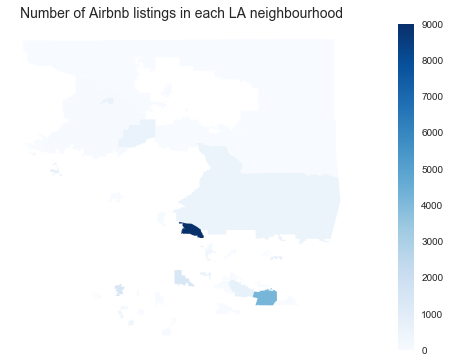

In [92]:
# Plotting the number of listings in each borough
fig1, ax1 = plt.subplots(1, figsize=(15, 6))
borough_map_df.plot('number_of_listings', cmap='Blues', ax=ax1)
ax1.axis('off')
ax1.set_title('Number of Airbnb listings in each LA neighbourhood', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=9000))
sm._A = [] # Creates an empty array for the data range
cbar = fig1.colorbar(sm)
plt.show()

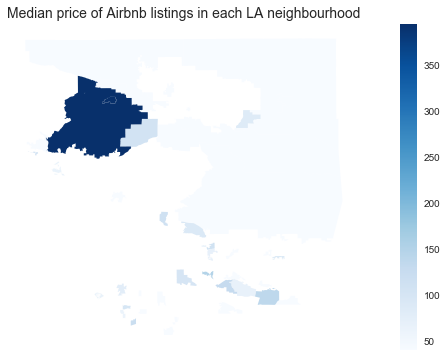

In [93]:
# Plotting the median price of listings in each borough
fig2, ax2 = plt.subplots(1, figsize=(15, 6))
borough_map_df.plot('median_price', cmap='Blues', ax=ax2)
ax2.axis('off')
ax2.set_title('Median price of Airbnb listings in each LA neighbourhood', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=min(borough_map_df.median_price), vmax=max(borough_map_df.median_price)))
sm._A = [] # Creates an empty array for the data range
cbar = fig2.colorbar(sm)
plt.show()

In [94]:
test_distance.shape

(2282, 2)

In [95]:
test_distance = test_distance.iloc[:50,:]

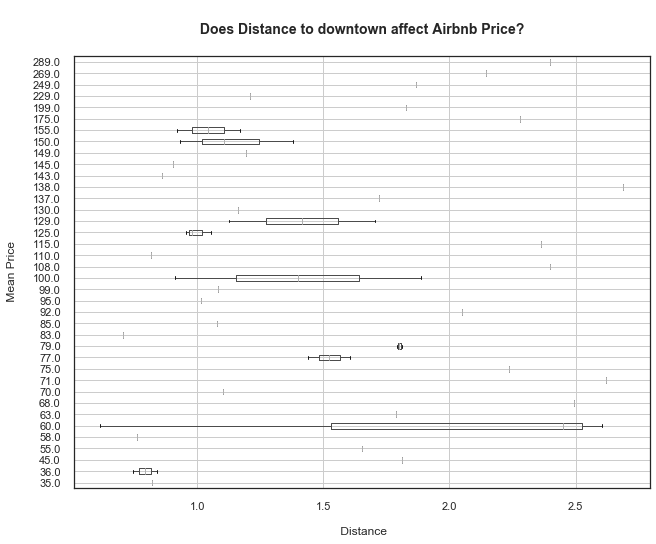

In [129]:
# box-plot
red_square = dict(markerfacecolor='salmon', markeredgecolor='salmon', marker='.')

test.boxplot(column='distance', by='daily_price', 
           flierprops=red_square, vert=False, figsize=(10,8))

plt.xlabel('\n Distance', fontsize=12)
plt.ylabel(' Mean Price\n', fontsize=12)
plt.title('\n Does Distance to downtown affect Airbnb Price? \n', fontsize=14, fontweight='bold')

# get rid of automatic boxplot title
plt.suptitle('');

In [130]:
test

,distance,daily_price
0,0.614908,60.0
1,0.707075,83.0
2,0.746310,36.0
3,0.763141,58.0
4,0.817459,110.0
5,0.821658,35.0
6,0.839761,36.0
7,0.859587,143.0
8,0.905015,145.0
9,0.912015,100.0


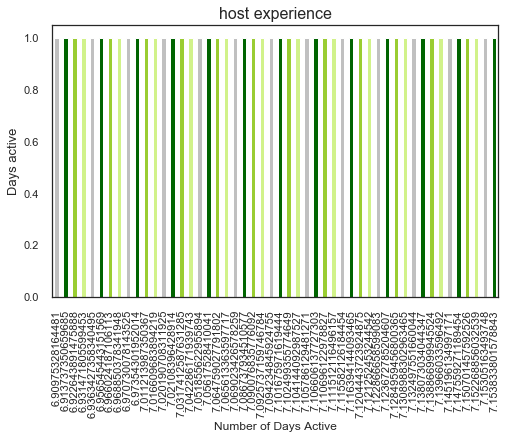

In [117]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
ax.set_title('host experience', fontsize=16)
test_active_days['host_days_active'].value_counts().sort_index(ascending=True).plot(kind='bar', color=['silver', 'darkgreen', 'yellowgreen', '#d1f28a' ], ax=ax)
ax.set_xlabel('Number of Days Active')
ax.set_ylabel('Days active', fontsize=13)
plt.show()

In [100]:
def multi_collinearity_heatmap(df, figsize=(11,9)):
    
    """
    Creates a heatmap of correlations between features in the df. A figure size can optionally be set.
    """
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = test.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

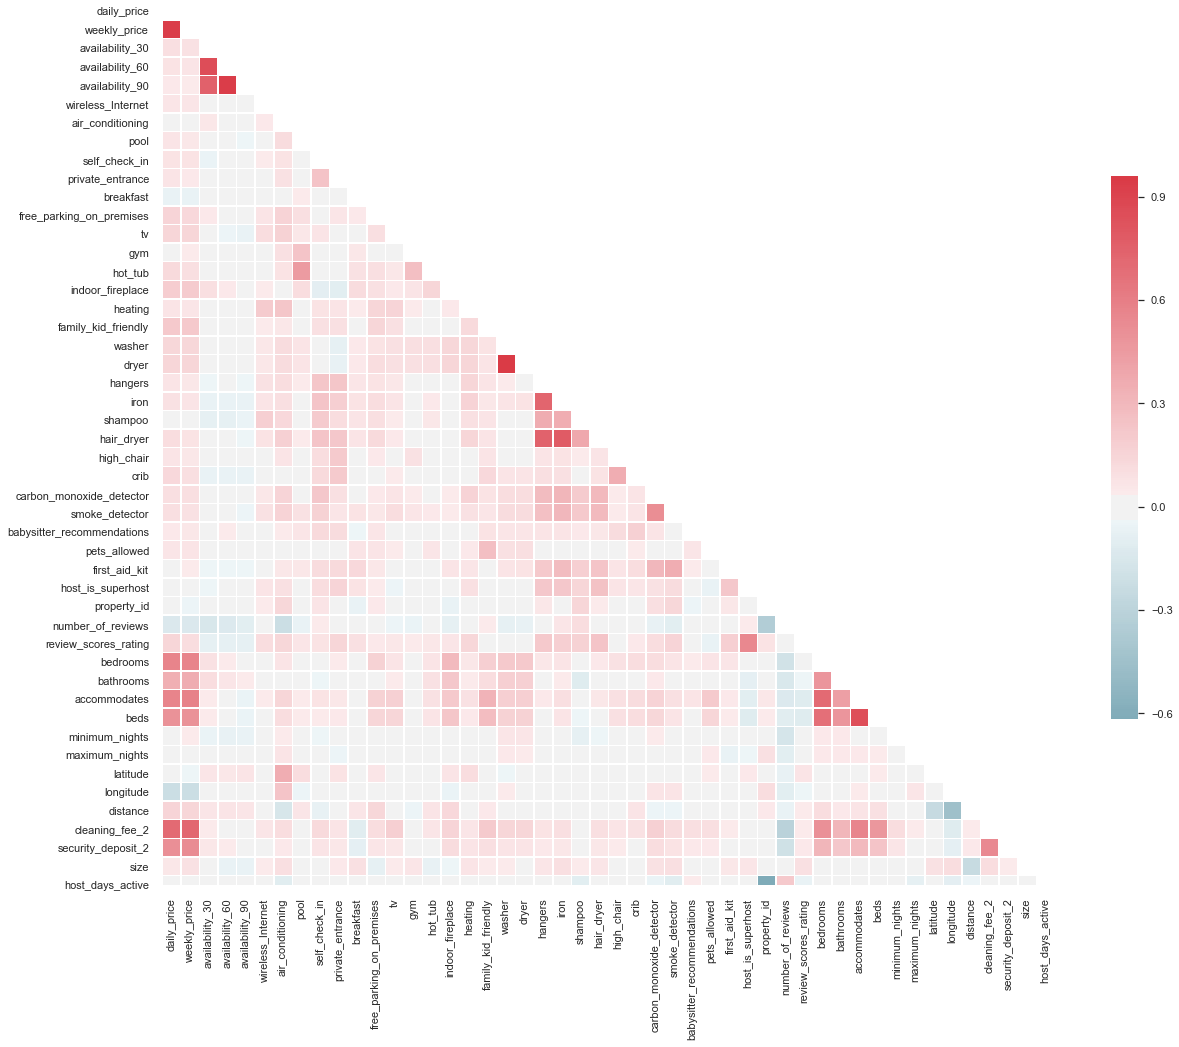

In [101]:
multi_collinearity_heatmap(test, figsize=(20,20))